In [1]:
from causalinfo import *

In [2]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [3]:
s, a, b = make_variables('S A B', 2)

In [4]:
# Note: we assume state 0 = False and state 1 = True
def transmit_same(i, o):
    o[i] = 1.0
    
def xnor(i1, i2, o):
    if i1 == i2:
        o[1] = 1.0
    else:
        o[0] = 1.0

In [5]:
same_eq = Equation('SAME', [s], [a], transmit_same)

In [6]:
xnor_eq = Equation('XNOR', [s, a], [b], xnor)

In [7]:
xnor_eq.show_mapping(b)

XNOR   
B      0  1
S A        
0 0    0  1
  1    1  0
1 0    1  0
  1    0  1

In [8]:
network = CausalNetwork([same_eq, xnor_eq])

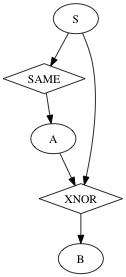

In [9]:
draw(network.full_network)

In [36]:
j = network.generate_joint()
j

,S,A,B,Pr
0,0,0,1,0.5
1,1,1,1,0.5


In [37]:
j.joint(a, b)

,,Pr
A,B,
0,1,0.5
1,1,0.5


In [12]:
j.mutual_info(a, b, s)

0.0

In [29]:
a.assign_uniform(do=True)
a

,A
0,0.5
1,0.5


In [33]:
j = network.generate_joint(do=[a])
j

,S,A,B,Pr
0,0,0,1,0.25
1,0,1,0,0.25
2,1,0,0,0.25
3,1,1,1,0.25


In [31]:
j.mutual_info(a, b, s)

1.0

In [14]:
c, s, a = make_variables('C S A', 4)

In [15]:
def swap_34(i, o):
    res = [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]
    o[:] = res[i]

In [16]:
p1 = Player('p1', [c], [s], transmit_same)
p2 = Player('p2', [s], [a], swap_34)

In [17]:
cn = CausalNetwork([p1, p2])
c.assign_uniform()

In [18]:
t2 = cn.generate_table()

In [19]:
t2.all_states

,C,S,A,Pr
0,0,0,0,0.25
1,1,1,1,0.25
2,2,2,3,0.25
3,3,3,2,0.25


In [20]:
t2.mutual_info(s, a)

2.0

In [21]:
t2.mutual_info(s, a, c)

0.0